<a href="https://colab.research.google.com/github/SainavyaGadde/DataScienceFinalProject/blob/main/data_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Importing Libraries

In [170]:
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

import torch
import torch.nn as nn
import torch.optim as optim

import warnings
warnings.filterwarnings("ignore")


####Loading the data


In [171]:
#save the csv file in google drive location
file_name = '/content/sample_data/household_power_consumption.csv'

# Load the dataset into a Pandas DataFrame.
df = pd.read_csv(file_name, na_values = ['nan','?'])

#display the first few rows of of the data
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [172]:
# check the sample
df.sample(4)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
108879,2/3/2007,8:03:00,0.354,0.19,241.99,1.6,0.0,1.0,0.0
789602,17/6/2008,1:26:00,0.152,0.00,239.80,0.6,0.0,0.0,1.0
459100,31/10/2007,13:04:00,5.050,0.24,234.51,22.0,0.0,51.0,17.0
870828,12/8/2008,11:12:00,0.080,0.00,240.30,0.2,0.0,0.0,1.0


In [173]:
# check size of data
df.shape

(1048575, 9)

In [174]:
# check data types
df.dtypes

,0
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64


#### Handling Missing Values


In [175]:
# check na
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,4069
Global_reactive_power,4069
Voltage,4069
Global_intensity,4069
Sub_metering_1,4069
Sub_metering_2,4069
Sub_metering_3,4069


In [176]:
# percentage of na
df.isna().sum()/df.shape[0]

,0
Date,0.000000
Time,0.000000
Global_active_power,0.003881
Global_reactive_power,0.003881
Voltage,0.003881
Global_intensity,0.003881
Sub_metering_1,0.003881
Sub_metering_2,0.003881
Sub_metering_3,0.003881


In [177]:
# check the na values
df[df.isna().any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,30/12/2006,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,30/12/2006,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1043669,10/12/2008,11:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043670,10/12/2008,11:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043671,10/12/2008,11:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043672,10/12/2008,11:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
# drop all nans
df.dropna(inplace=True)

In [179]:
# check if there are other nas
df.isna().any()

,0
Date,False
Time,False
Global_active_power,False
Global_reactive_power,False
Voltage,False
Global_intensity,False
Sub_metering_1,False
Sub_metering_2,False
Sub_metering_3,False


In [180]:
# Convert Date and Time into a single datetime column
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), format="%d/%m/%Y %H:%M:%S")


In [181]:
# Drop the date and Time column since we can get them on column created
df.drop(columns=["Date", "Time"], inplace=True)


In [182]:
# create some additional data
df["month"] = df["datetime"].dt.month
df["year"] = df["datetime"].dt.year
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df["dayofyear"] = df["datetime"].dt.dayofyear
df["dayname"] = df["datetime"].dt.day_name()


In [183]:
# for the purpose of analysis, create year-month column from datetime
df["year_month"] = df["datetime"].dt.strftime("%Y-%b")

In [184]:
# check sample
df.sample(4)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,month,year,day,hour,dayofyear,dayname,year_month
545561,4.970,0.224,239.79,20.8,1.0,37.0,18.0,2007-12-30 14:05:00,12,2007,30,14,364,Sunday,2007-Dec
341796,0.216,0.124,233.57,1.0,0.0,1.0,0.0,2007-08-11 02:00:00,8,2007,11,2,223,Saturday,2007-Aug
590376,0.328,0.000,242.51,1.4,0.0,0.0,0.0,2008-01-30 17:00:00,1,2008,30,17,30,Wednesday,2008-Jan
732675,3.924,0.308,234.81,16.8,37.0,0.0,17.0,2008-05-08 12:39:00,5,2008,8,12,129,Thursday,2008-May


####Exploratory Data Analysis (EDA)


In [185]:
# check the max between date ranges to obrserve when it starts and ends
df["datetime"].min(), df["datetime"].max()

(Timestamp('2006-12-16 17:24:00'), Timestamp('2008-12-13 21:38:00'))

In [186]:
data = df.copy()

data = data.sort_values(by="year_month").reset_index(drop=True)


In [187]:
# data
def plot_monthly_data(meaned_data, title, color, col, subplot_position):
    plt.subplot(subplot_position)
    meaned_data_sorted = meaned_data.sort_index(ascending=True)
    meaned_data_sorted.plot(kind='line', color=color, marker='o')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(ticks=range(len(meaned_data_sorted)), labels=meaned_data_sorted.index, rotation=45, fontsize=10)


#### Monthly *Trends*

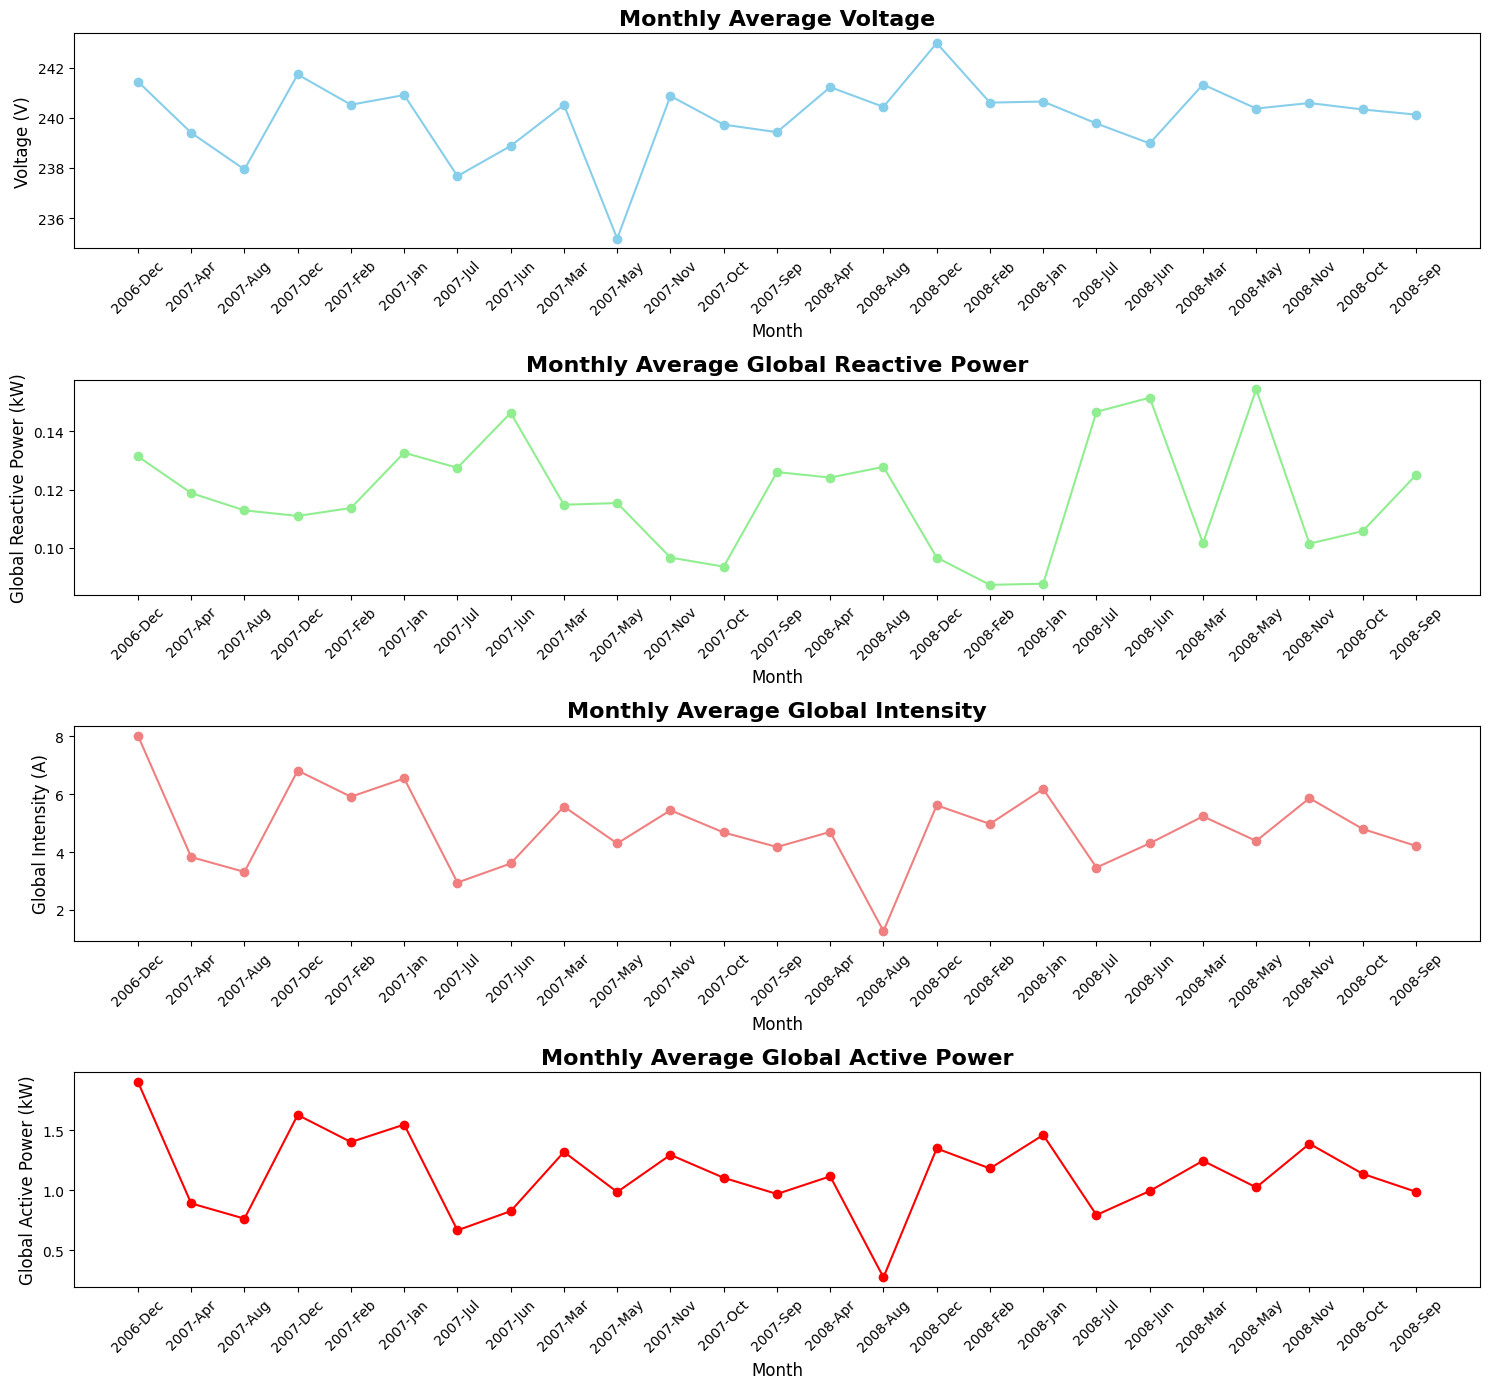

In [188]:
# lets plot AIR Information: VOltage, Active Power, Reactive Power, Intensity for monthly trends
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 14))
monthly_voltage = data.groupby('year_month')['Voltage'].mean()
plot_monthly_data(
    meaned_data=monthly_voltage,
    col='Voltage (V)',
    title='Monthly Average Voltage',
    color='skyblue',
    subplot_position=411
)

# Plot Global Reactive Power
monthly_reactive_power = data.groupby('year_month')['Global_reactive_power'].mean()
plot_monthly_data(
    meaned_data=monthly_reactive_power,
    col='Global Reactive Power (kW)',
    title='Monthly Average Global Reactive Power',
    color='lightgreen',
    subplot_position=412
)


# Plot Global Intensity
monthly_intensity = data.groupby('year_month')['Global_intensity'].mean()
plot_monthly_data(
    meaned_data=monthly_intensity,
    col='Global Intensity (A)',
    title='Monthly Average Global Intensity',
    color='lightcoral',
    subplot_position=413
)

# Plot Global Active Power
monthly_active_power = data.groupby('year_month')['Global_active_power'].mean()
plot_monthly_data(
    meaned_data=monthly_active_power,
    col='Global Active Power (kW)',
    title='Monthly Average Global Active Power',
    color='red',
    subplot_position=414
)

plt.tight_layout()
plt.show()

#### Monthly *Trends*

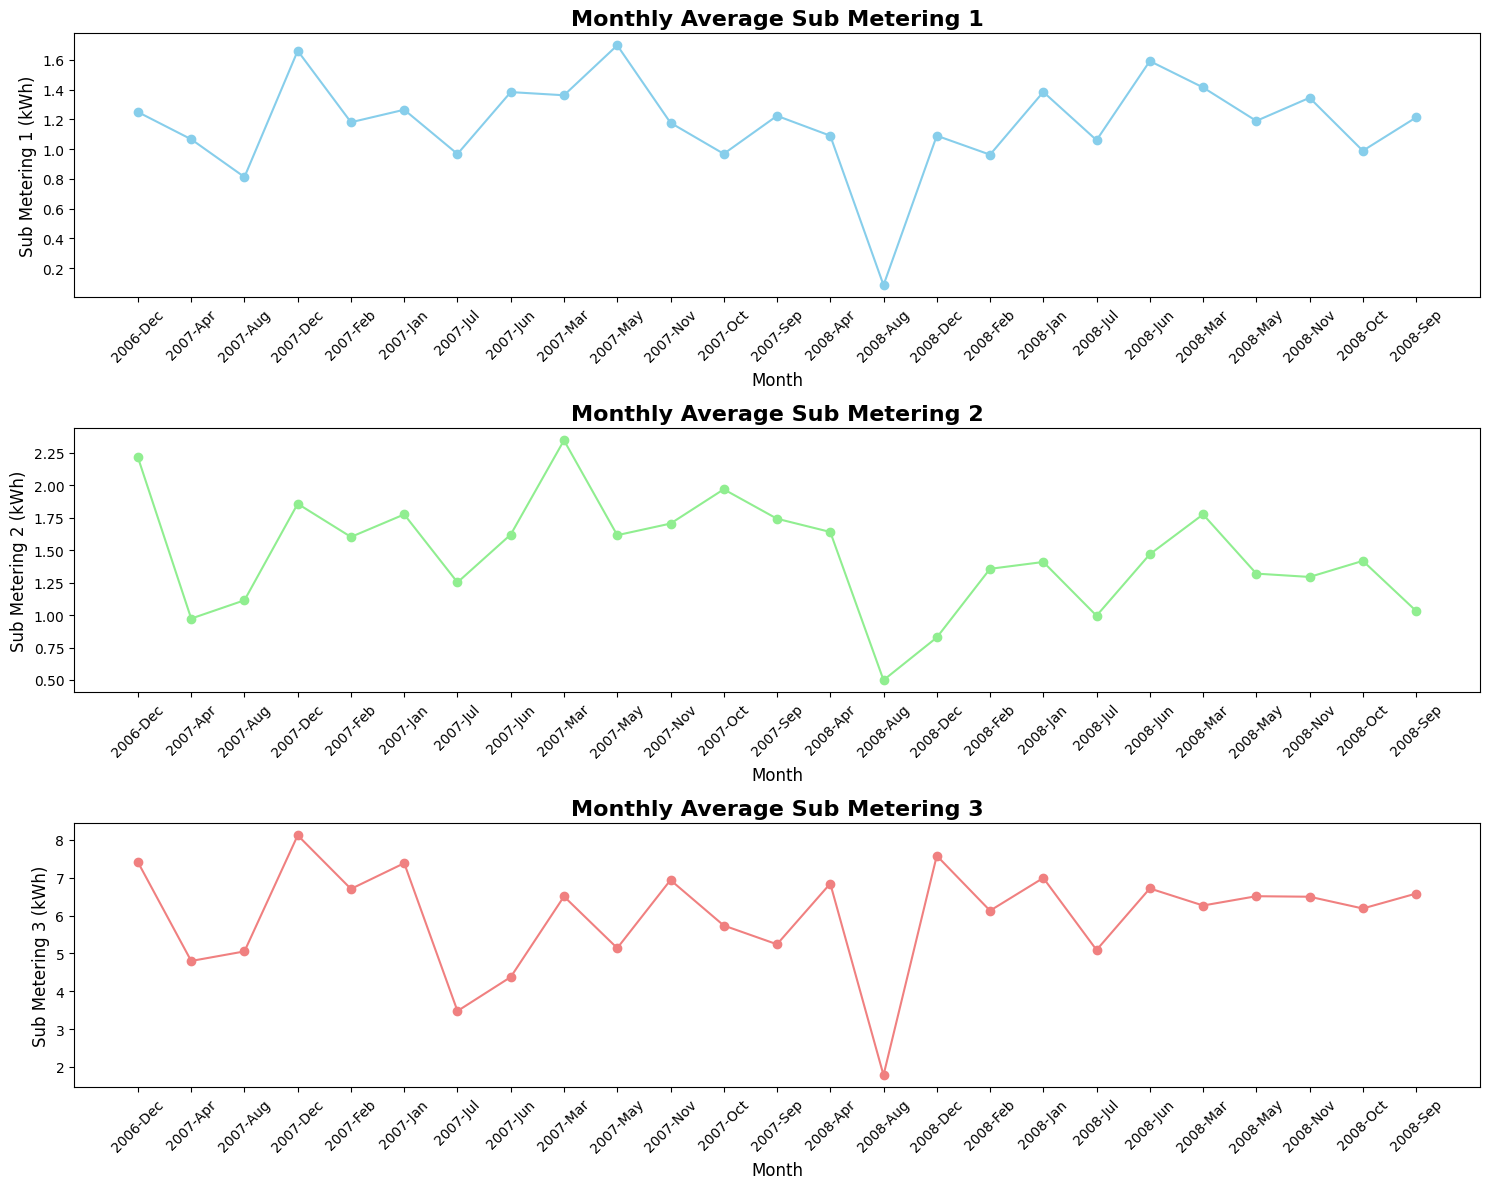

In [189]:
# do the same for SUB METERS
plt.figure(figsize=(15, 12))

# Sub_metering_1
Sub_metering_1 = data.groupby('year_month')['Sub_metering_1'].mean()
plot_monthly_data(
    meaned_data=Sub_metering_1,
    col='Sub Metering 1 (kWh)',
    title='Monthly Average Sub Metering 1',
    color='skyblue',
    subplot_position=311
)

# Sub_metering_2
Sub_metering_2 = data.groupby('year_month')['Sub_metering_2'].mean()
plot_monthly_data(
    meaned_data=Sub_metering_2,
    col='Sub Metering 2 (kWh)',
    title='Monthly Average Sub Metering 2',
    color='lightgreen',
    subplot_position=312
)

# Sub_metering_3
Sub_metering_3 = data.groupby('year_month')['Sub_metering_3'].mean()
plot_monthly_data(
    meaned_data=Sub_metering_3,
    col='Sub Metering 3 (kWh)',
    title='Monthly Average Sub Metering 3',
    color='lightcoral',
    subplot_position=313
)
plt.tight_layout()
plt.show()


#### Hourly *Trends*

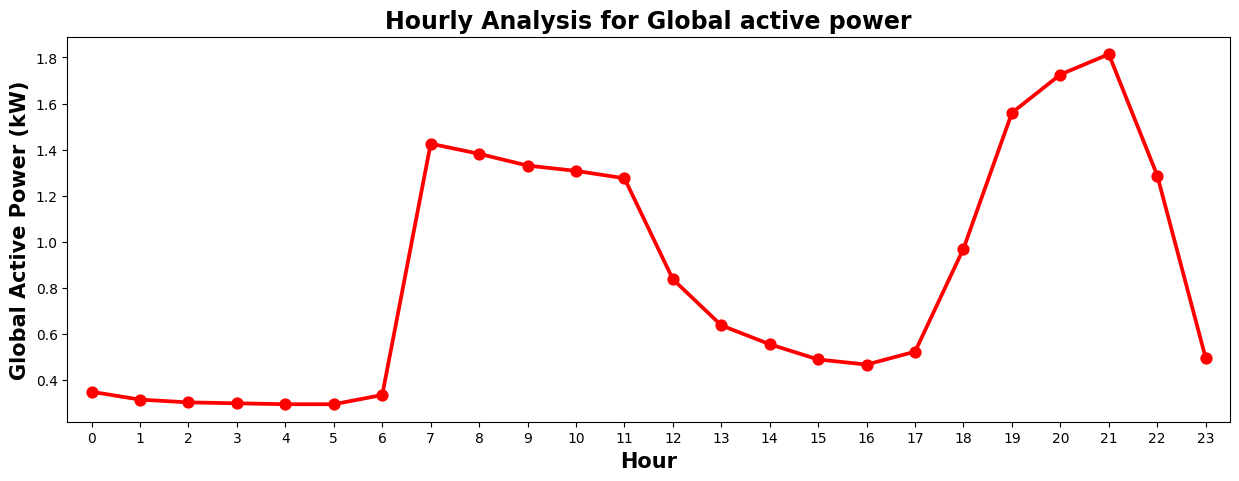

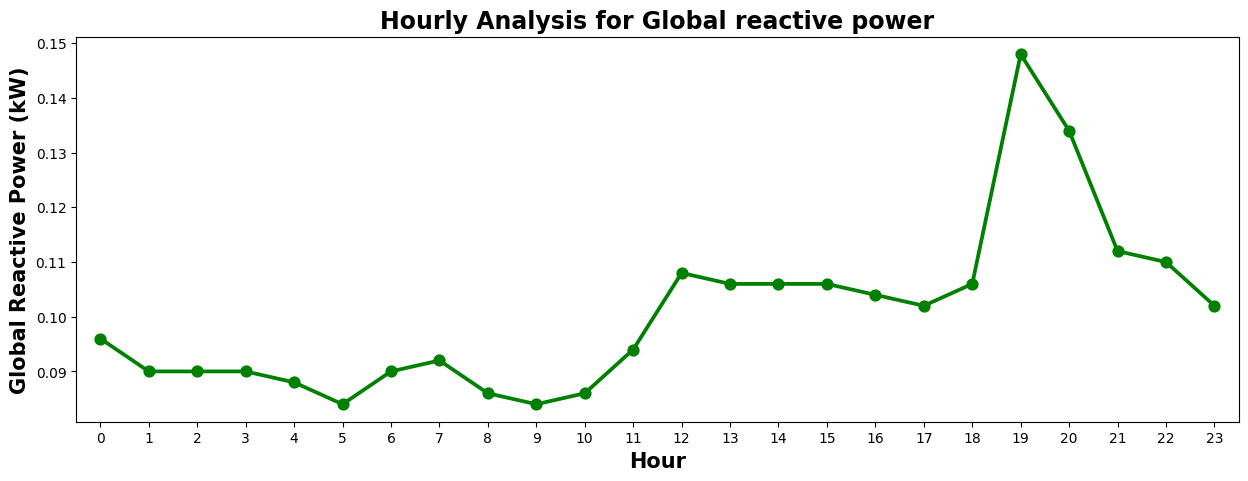

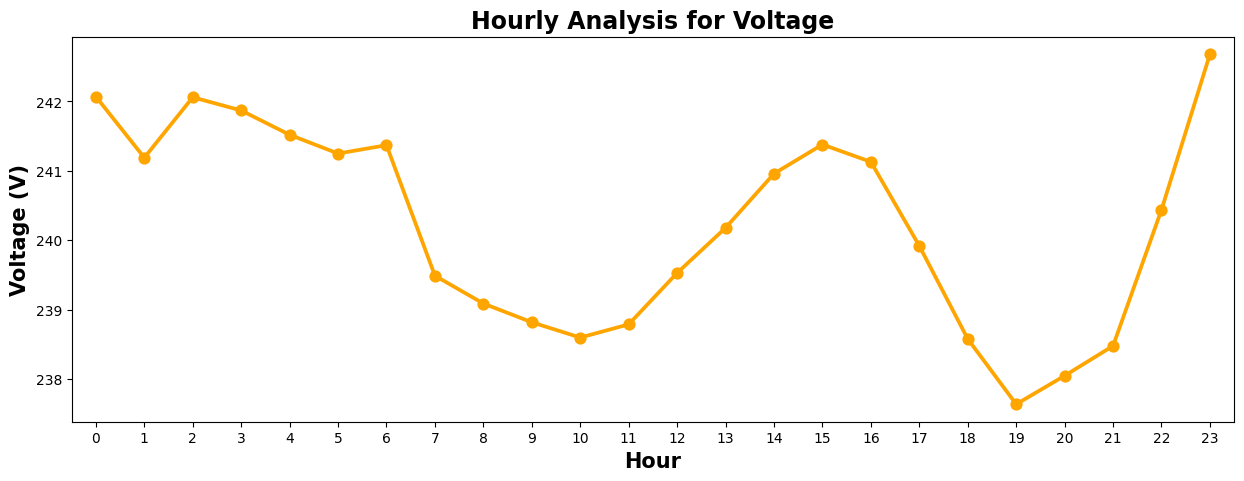

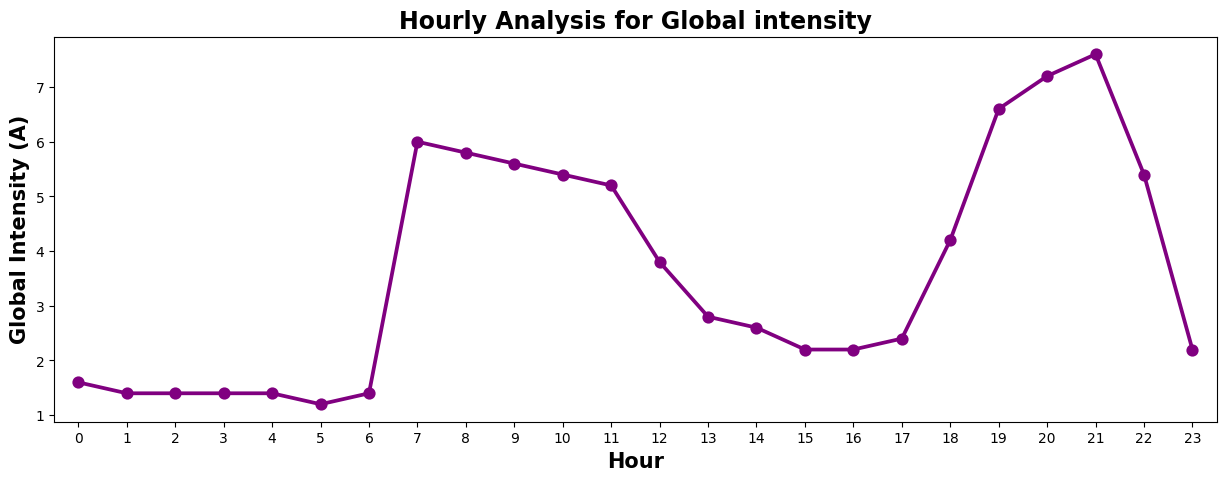

In [190]:
# do hour analysis of the energies
import seaborn as sns

colors = ['red', 'green', 'orange', 'purple', 'yellow', 'blue', 'cyan', 'magenta', 'gray', 'brown']
columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
y_labels = [
    'Global Active Power (kW)',
    'Global Reactive Power (kW)',
    'Voltage (V)',
    'Global Intensity (A)'
]

# create plots by medianed hour
for i, column in enumerate(columns):
    data_hr = (
        data[[column, 'hour']]
        .groupby(["hour"])
        .median()
        .reset_index()
        .sort_values(by='hour', ascending=False)
    )
    f, ax = plt.subplots(figsize=(15, 5))
    sns.pointplot(
        x='hour',
        y=column,
        data=data_hr,
        markers='o',
        color=colors[i % len(colors)]
    )

    plt.title(f"Hourly Analysis for {column.replace('_', ' ').capitalize()}", fontweight='bold', fontsize=17)
    plt.xlabel("Hour", fontweight='bold', fontsize=15)
    plt.ylabel(y_labels[i], fontweight='bold', fontsize=15)

    plt.show()


#### Hourly *Trends*

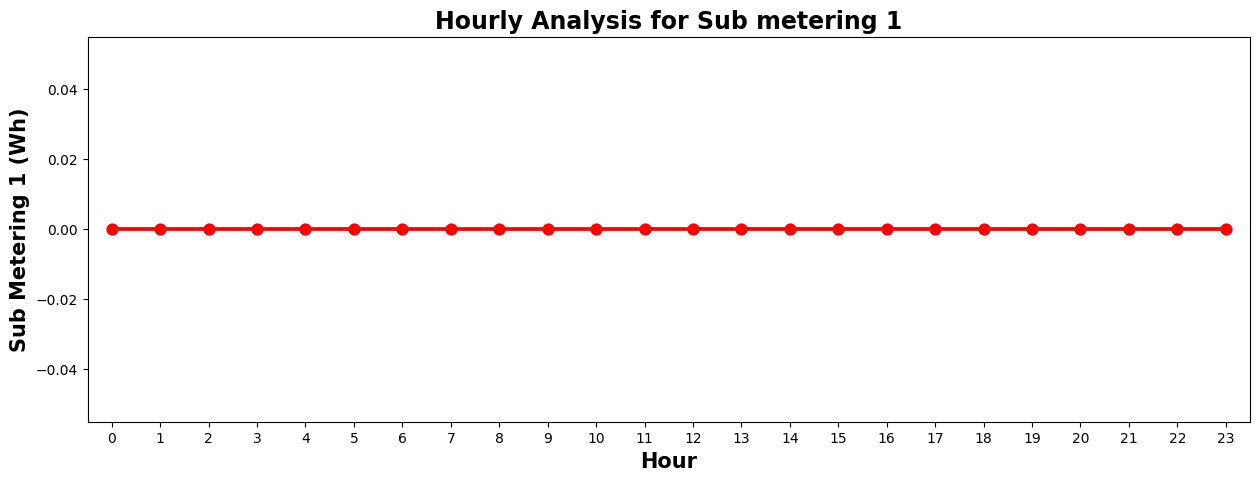

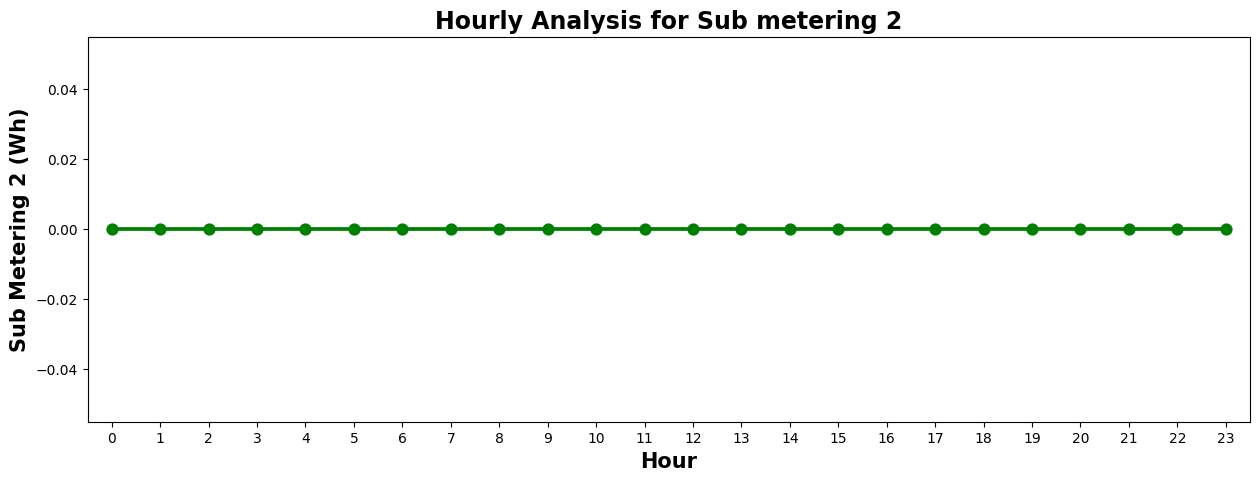

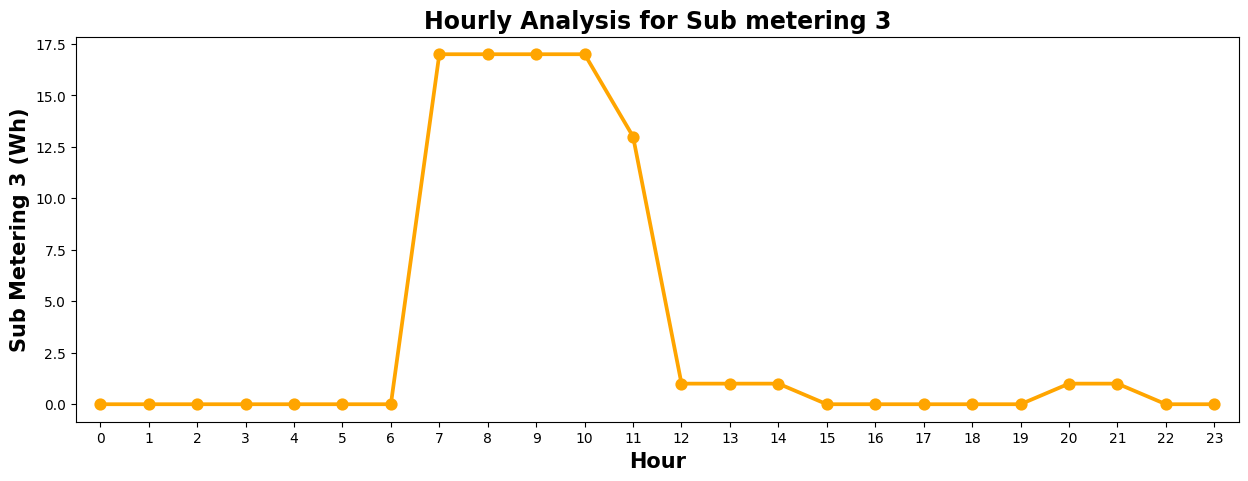

In [191]:
# BY sub meters
# cols for analysis (Sub_metering_1, Sub_metering_2, Sub_metering_3)
columns = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

y_labels = [
    'Sub Metering 1 (Wh)',
    'Sub Metering 2 (Wh)',
    'Sub Metering 3 (Wh)'
]

for i, column in enumerate(columns):
    data_hr = (
        data[[column, 'hour']]
        .groupby(["hour"])
        .median()
        .reset_index()
        .sort_values(by='hour', ascending=True)
    )

    f, ax = plt.subplots(figsize=(15, 5))
    sns.pointplot(
        x='hour',
        y=column,
        data=data_hr,
        markers='o',
        color=colors[i % len(colors)]
    )
    plt.title(f"Hourly Analysis for {column.replace('_', ' ').capitalize()}", fontweight='bold', fontsize=17)
    plt.xlabel("Hour", fontweight='bold', fontsize=15)
    plt.ylabel(y_labels[i], fontweight='bold', fontsize=15)

    plt.show()


In [192]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'datetime', 'month', 'year', 'day', 'hour',
       'dayofyear', 'dayname', 'year_month'],
      dtype='object')

#### Day of Week *Trends*

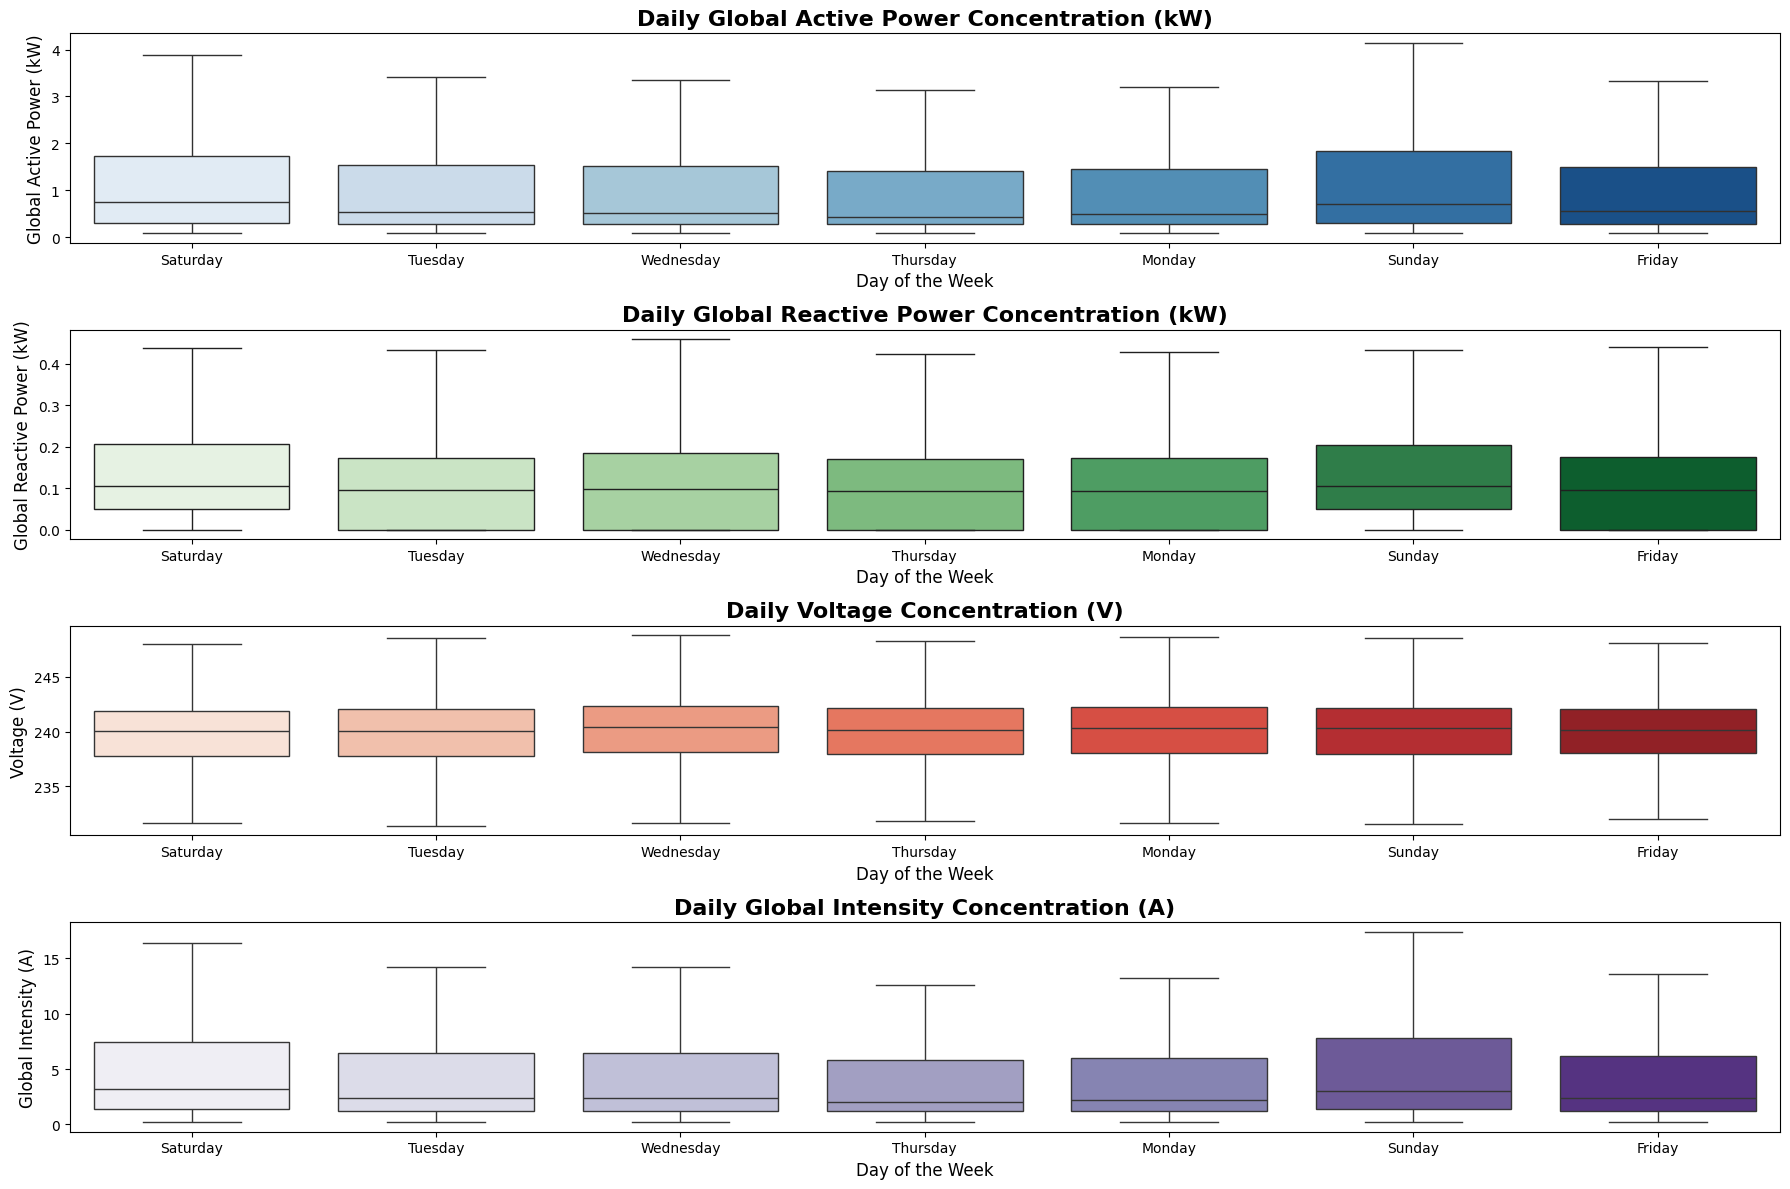

In [193]:
plt.figure(figsize=(18, 12))

# Global Active Power plot
plt.subplot(4, 1, 1)
sns.boxplot(x='dayname', y='Global_active_power', data=data, palette='Blues', showfliers=False)
plt.title('Daily Global Active Power Concentration (kW)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Global Active Power (kW)', fontsize=12)

# Global Reactive Power plot
plt.subplot(4, 1, 2)
sns.boxplot(x='dayname', y='Global_reactive_power', data=data, palette='Greens', showfliers=False)
plt.title('Daily Global Reactive Power Concentration (kW)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Global Reactive Power (kW)', fontsize=12)

# Voltage plot
plt.subplot(4, 1, 3)
sns.boxplot(x='dayname', y='Voltage', data=data, palette='Reds', showfliers=False)
plt.title('Daily Voltage Concentration (V)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Voltage (V)', fontsize=12)

# Global Intensity plot
plt.subplot(4, 1, 4)
sns.boxplot(x='dayname', y='Global_intensity', data=data, palette='Purples', showfliers=False)
plt.title('Daily Global Intensity Concentration (A)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Global Intensity (A)', fontsize=12)

plt.tight_layout()
plt.show()


#### Daily Trends

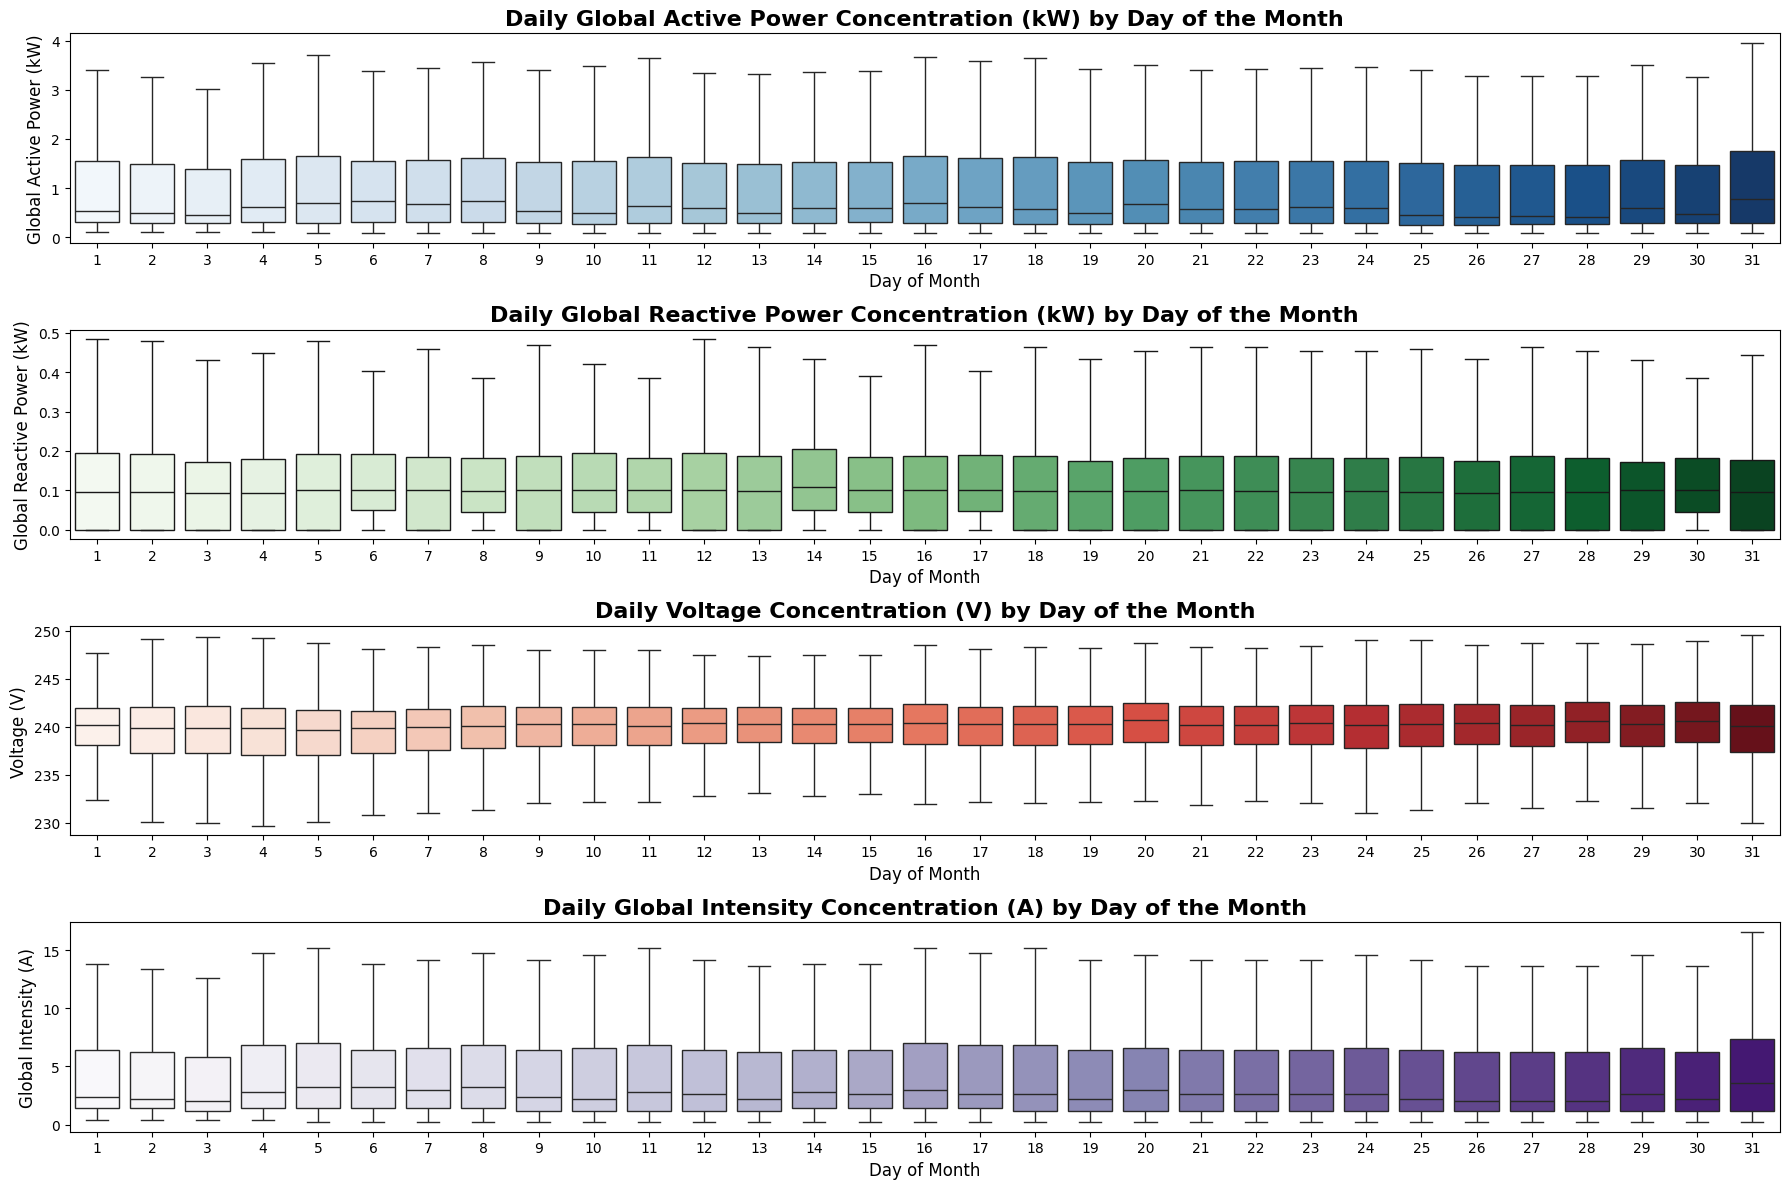

In [194]:
# grouping bu date of month
def plot_boxplot_by_group(data, group_col, y_col, title, palette, ylabel):
    sns.boxplot(x=group_col, y=y_col, data=data, palette=palette, showfliers=False)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Day of Month', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.tight_layout()

# Boxplots for day of the month (day) - grouped by day of the month
plt.figure(figsize=(18, 12))
plt.subplot(4, 1, 1)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Global_active_power',
    title='Daily Global Active Power Concentration (kW) by Day of the Month',
    palette='Blues',
    ylabel='Global Active Power (kW)'
)
plt.subplot(4, 1, 2)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Global_reactive_power',
    title='Daily Global Reactive Power Concentration (kW) by Day of the Month',
    palette='Greens',
    ylabel='Global Reactive Power (kW)'
)
plt.subplot(4, 1, 3)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Voltage',
    title='Daily Voltage Concentration (V) by Day of the Month',
    palette='Reds',
    ylabel='Voltage (V)'
)
plt.subplot(4, 1, 4)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Global_intensity',
    title='Daily Global Intensity Concentration (A) by Day of the Month',
    palette='Purples',
    ylabel='Global Intensity (A)'
)

plt.tight_layout()
plt.show()

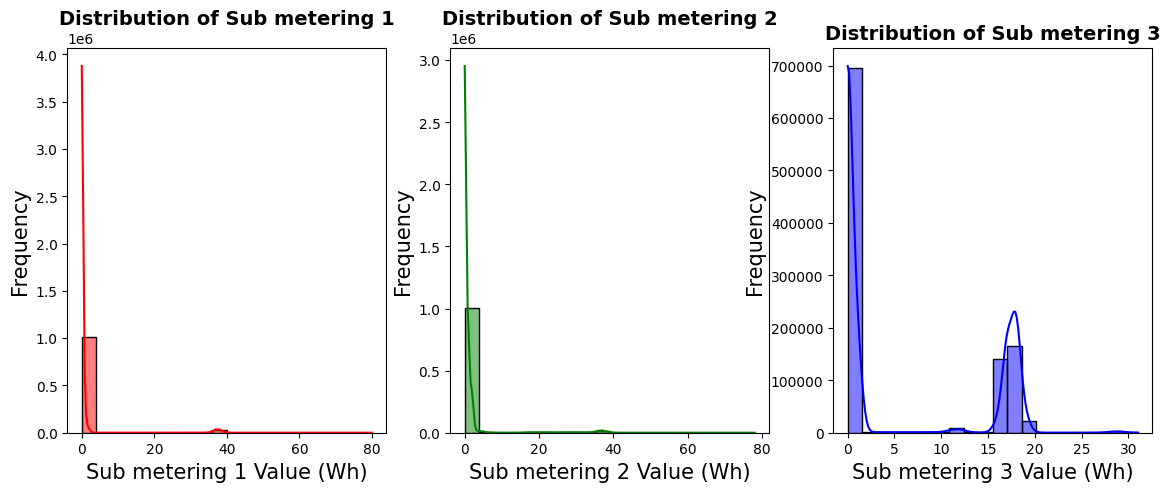

In [195]:
# distribution of submetering usages
columns = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
colors = ['red', 'green', 'blue']
plt.figure(figsize=(14, 5))
# for each sub meters
for i, column in enumerate(columns):
    plt.subplot(1,3,i+1)
    sns.histplot(data[column], kde=True, color=colors[i % len(colors)], bins=20)

    plt.title(f'Distribution of {column.replace("_", " ").capitalize()}', fontweight='bold', fontsize=14)
    plt.xlabel(f'{column.replace("_", " ").capitalize()} Value (Wh)', fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
plt.show()

In [196]:
# select numerical columns
# We exlude the TIME BASED VARIABLES
df_num = df.select_dtypes(include=["float", "int"]).drop(columns=["year", "dayofyear","month"])
df_num.head(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,hour
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16,17
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,16,17
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,16,17


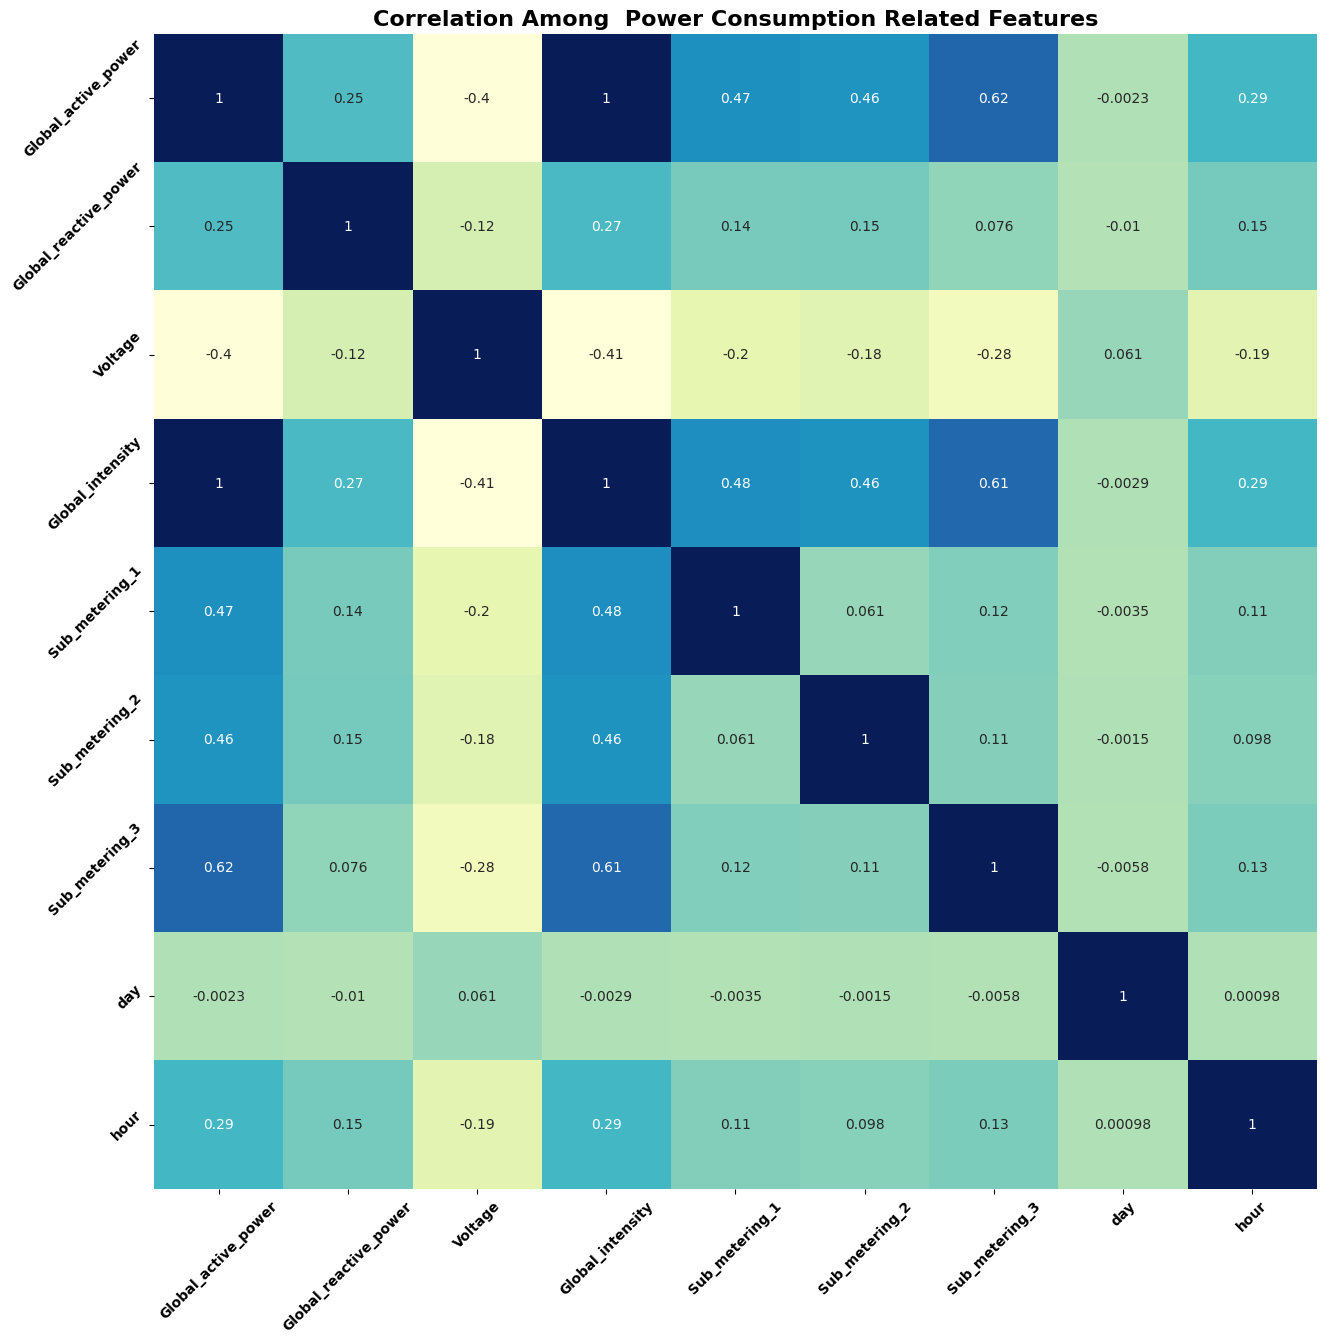

In [197]:
# plot corrrelation analysis
plt.figure(figsize=(15,15))
corr = df_num.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Correlation Among  Power Consumption Related Features", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.yticks(rotation=45, fontweight='bold')
plt.show()

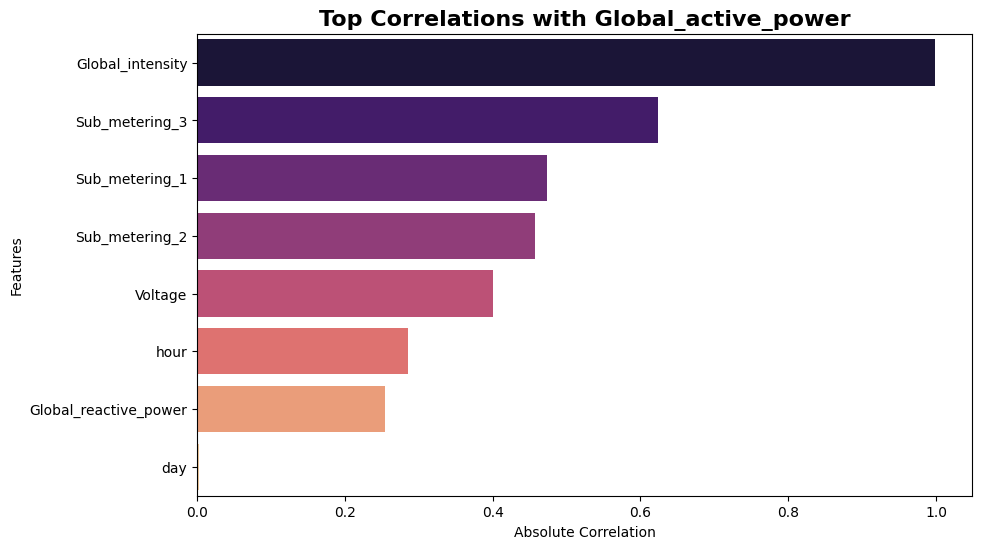

In [198]:
# get correlation with Global_active_power

# extract the Global_active_power column and sort the correlations
Global_active_power = corr['Global_active_power'].abs().sort_values(ascending=False)
# remove the first since is stroke itself
top_corr = Global_active_power.index[1:]

# a bar chart show the results
plt.figure(figsize=(10, 6))
sns.barplot(x=Global_active_power[top_corr], y=top_corr, palette='magma')
plt.title('Top Correlations with Global_active_power', fontsize=16, fontweight='bold')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')

plt.show()

#### MACHINE LEARNING

In [199]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,month,year,day,hour,dayofyear,dayname,year_month
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,12,2006,16,17,350,Saturday,2006-Dec
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,12,2006,16,17,350,Saturday,2006-Dec
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,12,2006,16,17,350,Saturday,2006-Dec
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,12,2006,16,17,350,Saturday,2006-Dec
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,12,2006,16,17,350,Saturday,2006-Dec


A breakdown of the fields in relation to your objectives and recommendations for refinement:

1. **Selected Features:**
   - **Global_reactive_power**: it has reactive power in the electrical system.
   - **Voltage**: Variations in voltage can affect power usage and appliance behavior, making it a relevant feature.
   - **Global_intensity**: it represents the current intensity in the electrical system and directly correlates with energy consumption.
   - **Sub_metering_1, Sub_metering_2, Sub_metering_3**: Sub-metering data provides granular insights into energy usage by different parts of the household, such as kitchen, laundry, etc.
   - **day**: The day of the week can capture periodic patterns (i.e, weekends vs. weekdays).
   - **hour**: The hour of the day captures diurnal patterns, such as peak usage during mornings and evenings.

2. **Target Variable:**
   - **Global_active_power**: Represents the total active power consumed by the household.

---


In [200]:
# we select only the columns above since they seems to have information about global power
COLUMNS = [
    'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
    'Sub_metering_3', 'day', 'hour'
]

TARGET = "Global_active_power"

In [201]:
# unique dates.
df["datetime"] = df["datetime"].astype("str").str.split(" ").str.get(0)

In [202]:
df = df.groupby("datetime")[COLUMNS+[TARGET]].mean().reset_index(drop=True)
df.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,hour,Global_active_power
0,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,16.0,20.181818,3.053475
1,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,17.0,11.500000,2.354486
2,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722,18.0,11.500000,1.530435
3,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,19.0,11.500000,1.157079
4,0.111804,242.308062,6.467361,0.000000,1.838889,9.765972,20.0,11.500000,1.545658


In [203]:
df.shape

(728, 9)

In [204]:

# ftn to create time steps
def create_time_steps(data, target, time_steps):
    """
    converts the df into sequences for time-series prediction.

    :param data: DataFrame containing features.
    :param target: Series containing the target variable.
    :param time_steps: Number of previous time steps to consider for prediction.
    :return: X, y arrays suitable for time-series modeling.
    """
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps].values)
        y.append(target[i + time_steps])
    return np.array(X), np.array(y)

In [214]:
# define paramss
TIME_STEPS = 1
BATCH_SIZE = 32
EPOCHS = 20
HIDDEN_SIZE = 128
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


<Axes: xlabel='Global_active_power', ylabel='Density'>

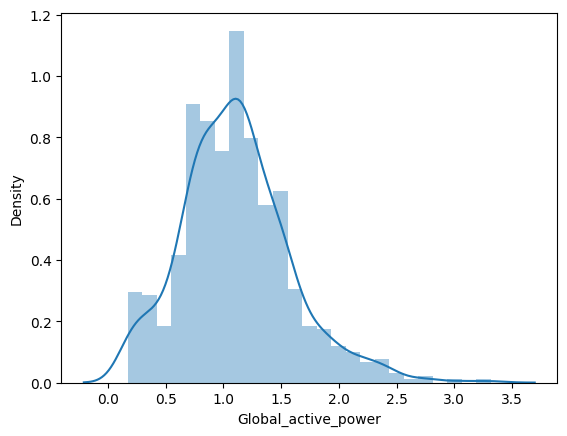

In [206]:
# check how the target distribution is
sns.distplot(df[TARGET])

<Axes: xlabel='Global_active_power', ylabel='Density'>

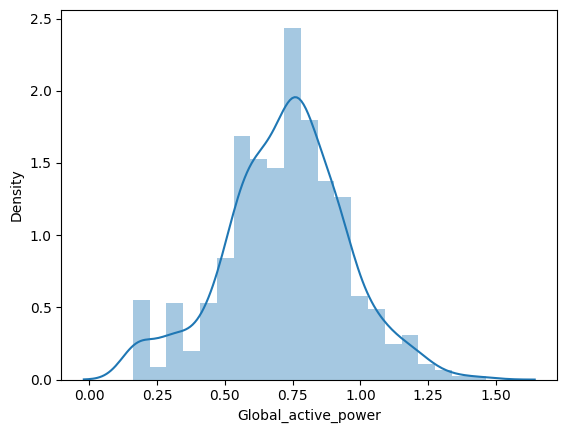

In [207]:
sns.distplot(np.log1p(df[TARGET]))

In [208]:
df.head(2)

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,hour,Global_active_power
0,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,16.0,20.181818,3.053475
1,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,17.0,11.500000,2.354486


In [209]:
# data scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[COLUMNS])

target_converted = np.log1p(df[TARGET])
# convert back to for easier handling
scaled_df = pd.DataFrame(scaled_data, columns=COLUMNS)


# create sequence data
X, y = create_time_steps(
    data=scaled_df[COLUMNS],
    target=target_converted,
    time_steps=TIME_STEPS
)


In [210]:
# check the shape
X.shape, y.shape

((727, 1, 8), (727,))

In [211]:
# split the data into training and testing sets
train_size = int(len(X) * 0.9)
Xtrain, Xtest = X[:train_size], X[train_size:]
ytrain, ytest = y[:train_size], y[train_size:]

In [212]:
Xtrain[:3][:3][0]

array([[-0.95825253, -1.83014195,  4.22646963, -1.04035974, -0.06082628,
         2.60680038,  0.0313462 , 14.49334758]])

In [213]:
Xtest.shape, ytest.shape, Xtrain.shape, ytrain.shape

((73, 1, 8), (73,), (654, 1, 8), (654,))